Importing necessary files and general libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## creating dataframe of the csv files
## using encoding value as latin-1 to avoid UnicodeDecodeError
user_engagement1 = pd.read_csv(r'/content/takehome_user_engagement 1.csv', encoding = 'latin-1')
users2 = pd.read_csv(r'/content/takehome_users 2.csv', encoding = 'latin-1')

In [3]:
user_engagement1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
users2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# Exploratory Analysis and Preprocessing

In [5]:
## Dataframe information
user_engagement1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
users2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB




*   It is observed that null values are present in 2 out of the 8 features of users2 such as **last_session_creation_time** and **invited_by_user_id** respectively



In [7]:
# last_session_creation_time = 3177
# invited_by_user_id = 5583
users2.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

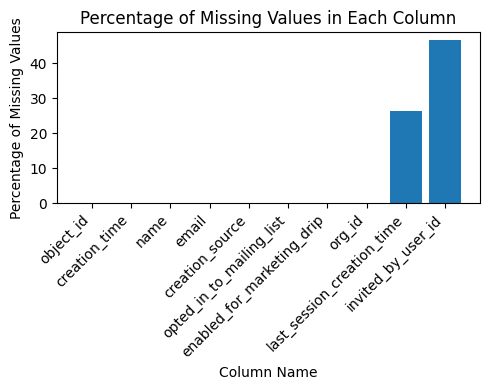

In [8]:
## plotting percentage distribution of missing values by each column
missing = users2.isnull().mean()*100
missing_value_df = pd.DataFrame({'column_name': users2.columns, 'percent_missing': missing})
missing_value_df.sort_values('percent_missing',inplace=True)

plt.figure(figsize=(5, 4))
plt.bar(missing_value_df['column_name'], missing_value_df['percent_missing'])
plt.xlabel('Column Name')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
users2.isnull().mean()*100

object_id                      0.000
creation_time                  0.000
name                           0.000
email                          0.000
creation_source                0.000
last_session_creation_time    26.475
opted_in_to_mailing_list       0.000
enabled_for_marketing_drip     0.000
org_id                         0.000
invited_by_user_id            46.525
dtype: float64



*   **last_session_creation_time** is having 26.47% of missing values
*   **invited_by_user_id** is having 46.52% of missing values which is huge



In [10]:
## adding weeknumber of the year and weekday as per ISO 8601 standard
user_engagement1['time_stamp'] = pd.to_datetime(user_engagement1['time_stamp'],errors='coerce')
user_engagement1['week_number']=user_engagement1['time_stamp'].dt.isocalendar().week
user_engagement1['week_day']=user_engagement1['time_stamp'].dt.isocalendar().day

In [11]:
user_engagement1.head()

,time_stamp,user_id,visited,week_number,week_day
0,2014-04-22 03:53:30,1,1,17,2
1,2013-11-15 03:45:04,2,1,46,5
2,2013-11-29 03:45:04,2,1,48,5
3,2013-12-09 03:45:04,2,1,50,1
4,2013-12-25 03:45:04,2,1,52,3


In [12]:
## Distribution of #visited on all 7 days of all weeks
user_engagement1.groupby(['week_day'], as_index=False)['visited'].sum()

,week_day,visited
0,1,29711
1,2,29784
2,3,29742
3,4,29448
4,5,29730
5,6,29728
6,7,29774


In [13]:
## It is observed that there is no bias towards a specific day of a week as distribution of #visited is almost equal throughout weeks.



*   It is observed that there is no bias towards a specific day of a week as distribution of #visited is almost equal throughout weeks



In [14]:
## creating another dataframe for sole purpose of user adoption based on condition: visited>=3 within any week
## adoption = 1,0 i.e. adopted and not adopted respectively
user_engagement1_adopted= pd.DataFrame(user_engagement1.groupby(['user_id','week_number'], as_index=False)['visited'].sum())
user_engagement1_adopted['adopted']= user_engagement1_adopted['visited'].apply(lambda x: 1 if x>=3 else 0)
user_engagement1_adopted

,user_id,week_number,visited,adopted
0,1,17,1,0
1,2,1,1,0
2,2,2,1,0
3,2,6,3,1
4,2,7,2,0
...,...,...,...,...
57167,11996,36,1,0
57168,11997,3,1,0
57169,11998,17,1,0
57170,11999,22,1,0


In [15]:
user_engagement1_adopted['adopted'].value_counts()

adopted
1    29771
0    27401
Name: count, dtype: int64

In [16]:
user_engagement1_adopted= user_engagement1_adopted.groupby(['user_id'],as_index=False)['adopted'].sum()
user_engagement1_adopted['adopted']= user_engagement1_adopted['adopted'].apply(lambda x: 1 if x>=3 else 0)

In [17]:
user_engagement1_adopted['adopted'].value_counts()

adopted
0    7676
1    1147
Name: count, dtype: int64

In [18]:
## merging both the dataframes and creating a single dataframe alltogether with all features
user_adopted = users2.merge(user_engagement1_adopted, how= 'left', left_on='object_id',right_on='user_id')
user_adopted

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,11996.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,11997.0,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,11998.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,11999.0,0.0


In [19]:
user_adopted['adopted'].isnull().sum()

3177

In [20]:
## 3,177 out of 12,000 user ids are missing the information about adoption
## Assuming adoption is our primary concern we can remove all the users who has missing value in aoption column




*   3,177 out of 12,000 user ids are missing the information about adoption
*   Assuming adoption is our primary concern we can remove all the users who has missing value in aoption column



In [21]:
user_adopted.dropna(subset=['adopted'], inplace=True)

In [22]:
user_adopted.shape

(8823, 12)



*   No. of rows has gone down to 8,823 from 12,000



In [23]:
user_adopted['adopted']=user_adopted['adopted'].astype(int)

In [24]:
user_adopted['adopted'].value_counts()

adopted
0    7676
1    1147
Name: count, dtype: int64

In [25]:
## Breaking down the Creation_time into useful variables such as year, week, day and hour

user_adopted['creation_time'] = pd.to_datetime(user_adopted['creation_time'],errors='coerce')
user_adopted['year']=user_adopted['creation_time'].dt.isocalendar().year
user_adopted['week_number']=user_adopted['creation_time'].dt.isocalendar().week
user_adopted['week_day']=user_adopted['creation_time'].dt.isocalendar().day
user_adopted['day_hour']=user_adopted['creation_time'].dt.hour

[Text(0, 0, '257'),
 Text(0, 0, '388'),
 Text(0, 0, '114'),
 Text(0, 0, '224'),
 Text(0, 0, '164')]

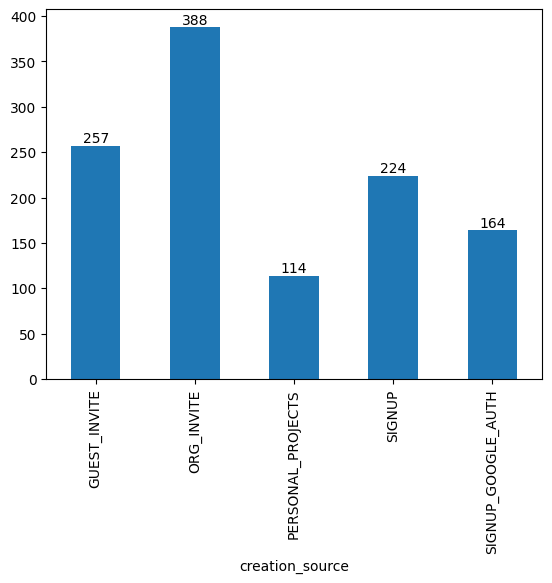

In [26]:
ax= user_adopted.groupby(['creation_source'])['adopted'].sum().plot(kind='bar')
ax.bar_label(ax.containers[0])



*   Observed that Personal Project as Creation Source has the lowest tendency for adoption
*   Whereas Org invite as Creation Source has the highest rate of adoption



[Text(0, 0, '843'), Text(0, 0, '304')]

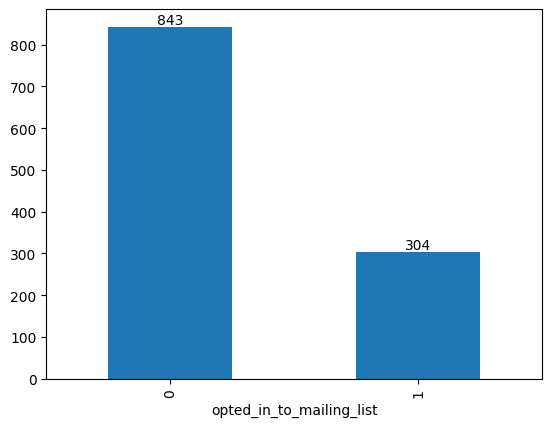

In [27]:
## adoption by opted_in_to_mailing_list

ax= user_adopted.groupby(['opted_in_to_mailing_list'])['adopted'].sum().plot(kind='bar')
ax.bar_label(ax.containers[0])



*   Users who opted into marketing mailing list has the 73% tendency for adoption



[Text(0, 0, '971'), Text(0, 0, '176')]

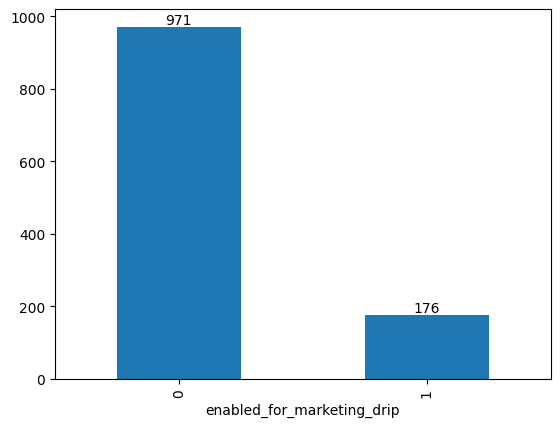

In [28]:
## adoption by enabled_for_marketing_drip

ax=user_adopted.groupby(['enabled_for_marketing_drip'])['adopted'].sum().plot(kind='bar')
ax.bar_label(ax.containers[0])



*   Users on regular marketing email drip choose for adoption by almost 85% of the time




In [29]:
## Most adoption by org_id

user_adopted.groupby(['org_id'],as_index=False)['adopted'].sum().sort_values(by='adopted',ascending=False).head(12)

,org_id,adopted
7,7,15
2,2,12
1,1,10
5,5,10
13,13,10
3,3,9
4,4,9
62,62,9
24,24,9
9,9,9


In [30]:
## Most adoption by invited_by_user_id
## we can ignore missing values of invited_by_user_id for now

user_adopted.groupby(['invited_by_user_id'],as_index=False)['adopted'].sum().sort_values(by='adopted',ascending=False).head(10)

,invited_by_user_id,adopted
431,2354.0,4
1795,9510.0,3
669,3623.0,3
753,4019.0,3
509,2776.0,3
365,2017.0,3
541,2994.0,3
1122,5910.0,3
1337,7107.0,3
1910,10163.0,3


In [31]:
## Bit more preprossesing before feeding to models
## removing invited_by_user_id as it has missing values and it is not making considerable difference in adoption distribution
user_adopted['org_id']=user_adopted['org_id'].astype(str)
user_adopted.drop(columns=['object_id', 'creation_time', 'name', 'email','last_session_creation_time','invited_by_user_id',
                           'user_id'],inplace=True)



In [32]:
user_adopted.isnull().sum()

creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
adopted                       0
year                          0
week_number                   0
week_day                      0
day_hour                      0
dtype: int64

In [33]:
## Checking if there is any non-linear or linear correlation between opted_in_to_mailing_list and enabled_for_marketing_drip
from scipy.stats import spearmanr
corr, _ = spearmanr(user_adopted['opted_in_to_mailing_list'],user_adopted['enabled_for_marketing_drip'])
print(f"Spearman's correlation: {corr:.3f}")

Spearman's correlation: 0.488


In [34]:
from scipy.stats import pearsonr
corr, _ = pearsonr(user_adopted['opted_in_to_mailing_list'],user_adopted['enabled_for_marketing_drip'])
print(f"Spearman's correlation: {corr:.3f}")

Spearman's correlation: 0.488




*   The correlation between **opted_in_to_mailing_list** and **enabled_for_marketing_drip** is low and can be consumed



# Feature Engineering

In [35]:
user_adopted_encoded= user_adopted.copy()

In [36]:
user_adopted_encoded = pd.get_dummies(user_adopted_encoded, columns=['creation_source', 'org_id'])

In [37]:
user_adopted_encoded.tail()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,year,week_number,week_day,day_hour,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,...,org_id_90,org_id_91,org_id_92,org_id_93,org_id_94,org_id_95,org_id_96,org_id_97,org_id_98,org_id_99
11995,0,0,0,2013,36,5,6,False,True,False,...,False,False,False,False,False,False,False,False,False,False
11996,0,0,0,2013,2,4,18,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11997,1,1,0,2014,17,7,12,True,False,False,...,False,False,False,False,False,False,False,False,False,False
11998,0,0,0,2012,22,4,11,False,False,True,...,False,False,False,False,False,False,False,False,False,False
11999,0,1,0,2014,4,7,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
user_adopted_encoded['adopted'].value_counts()

adopted
0    7676
1    1147
Name: count, dtype: int64



*  The dataset is imbalanced as there is a huge difference between adoption and non-adoption distribution



In [43]:
from imblearn.over_sampling import RandomOverSampler

X= user_adopted_encoded.drop(columns=['adopted']).values
y= user_adopted_encoded['adopted'].values

## Applying RandomOverSampling to balance the dataset
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scaling data before applying PCA
scaling=StandardScaler()
scaling.fit(X_over)
Scaled_data=scaling.transform(X_over)

# Setting the n_components=50
principal=PCA(n_components=50)
principal.fit(Scaled_data)
X_over_pca= principal.transform(Scaled_data)

# Checking the dimensions of data after PCA
print(X_over_pca.shape)

(15352, 50)


In [46]:
## variance explained by each principal component
print(principal.explained_variance_ratio_)

[0.0041753  0.00392681 0.00379725 0.00342535 0.00327388 0.00305394
 0.00282746 0.00276335 0.00239569 0.00237017 0.00234883 0.00234734
 0.00234527 0.00234491 0.00234464 0.0023443  0.00234374 0.00234368
 0.00234345 0.00234325 0.00234287 0.00234265 0.00234256 0.00234244
 0.0023424  0.00234234 0.00234214 0.00234211 0.002342   0.00234191
 0.00234184 0.00234173 0.00234161 0.00234158 0.00234141 0.00234139
 0.00234137 0.00234124 0.00234123 0.00234116 0.00234111 0.00234104
 0.002341   0.00234091 0.00234083 0.00234081 0.00234073 0.00234058
 0.00234054 0.00234043]




*   Explained variance ration is too much low even for 50 components
*   with such large number of encoded features PCA interpretability would be another issue




# Model Selection

In [ ]:
## Model selection

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Defining a dictionary with the models to be tested
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC(),
}

# Defining the hyperparameters grids for each model
param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10], 'max_iter': [100, 200]},
    'RandomForestClassifier': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'GradientBoostingClassifier': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Apply GridSearchCV for each model
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the corresponding score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")

    # Evaluate on the test set
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))




Running GridSearchCV for LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for LogisticRegression: {'C': 0.1, 'max_iter': 200}
Best score for LogisticRegression: 0.6084182466104291
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      1573
           1       0.60      0.66      0.63      1498

    accuracy                           0.62      3071
   macro avg       0.62      0.62      0.62      3071
weighted avg       0.62      0.62      0.62      3071

Running GridSearchCV for RandomForestClassifier
Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 50}
Best score for RandomForestClassifier: 0.959774771012556
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1573
           1       0.96      1.00      0.97      1498

    accuracy                           0.97      3071
   macro avg       0.98      0.98      0.97      3071
weighted avg       0.98      0.97      0.97      3071

Running GridSearchCV for GradientBo

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(




*  logistic regression is finding difficulties in convergence using lbfgs solver.
*   liblinear and newton-cg with combination of penalty terms such as l1,l2 and None are taking longer time
*   Large number of features may be the reason that logistic regression is not welcomed here

*   RandomForestClassifier is performing very well with 98% accuracy and f1-score being 0.98 with hyperparameter like max_depth=None and n_estimator=100

*   GradientBoostingClassifier may take a while to run as CPU multithreading is not possible in GBM and the huge dimension of the dataset is an issue

*   Support Vector Classifier or SVC may take longer time to learn and validate as dimensionality is an issue again with such large number of feature





# Future Scope



*   We can perform an indepth dimensionality reduction and later can play with all the models and their hyperparameters

